In [ ]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():

    # Tell PyTorch to use the GPU.
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

No GPU available, using the CPU instead.


In [12]:
import nltk

In [1]:
#reading our dataset using pandas
import pandas as pd
judgements = pd.read_csv('/Users/meetbanthia/Documents/HaleLab/judge.csv',sep='\t',names=['filename','judgement'])
summaries = pd.read_csv('/Users/meetbanthia/Documents/HaleLab/sum.csv',sep='\t',names=['filename','summary'])

In [2]:
judgements

,filename,judgement
0,3644,vil Appeal No. 1948 of 1968 '. Appeal from the...
1,5235,Criminal Appeal No. 13 of 1981 From the Judgme...
2,1053,Appeal No. 222 of 1960. Appeal from the judgme...
3,1735,Appeal No. 507 of 1961. Appeal from the judgme...
4,5553,Civil Appeal No. 3947 (NT) of 1987. From the J...
...,...,...
7025,6043,ivil Appeal No. 1357 of 1973. From the Judgmen...
7026,6725,ivil Appeal No. 2123 of 1991. From the Judgmen...
7027,2543,Appeals Nos. 1153 to 1160 and 1161 to 1168 of ...
7028,3885,Civil Appeal No. 2329 of 1969. Appeal by Speci...


In [ ]:
summaries

,filename,summary
0,3644,The appellant purchased the land in question f...
1,5235,"The appellant and the respondent, who were alr..."
2,1053,The respondents filed a suit for specific perf...
3,1735,Respondent No. 1 obtained a mortgage decree fo...
4,5553,"% The respondent, Aditya V. Birla, described t..."
...,...,...
7025,6043,One Darbar Harsurvala by virtue of a declarato...
7026,6725,The appellant was a Manager in one of the bran...
7027,2543,The assessee Electricity Board constituted und...
7028,3885,Practice and Procedure Conduct of parties to b...


In [ ]:
orig = pd.merge(judgements, summaries, on='filename')

In [ ]:
len(orig)

7030

Observed that 1711th summary is 'nan' float type

This bug will be handled while using the data

In [ ]:
orig['judgement_len'] = orig['judgement'].str.len()
orig['summary_len'] = orig['summary'].str.len()

In [ ]:
orig

,filename,judgement,summary,judgement_len,summary_len
0,3644,vil Appeal No. 1948 of 1968 '. Appeal from the...,The appellant purchased the land in question f...,9330,1903
1,5235,Criminal Appeal No. 13 of 1981 From the Judgme...,"The appellant and the respondent, who were alr...",13803,7181
2,1053,Appeal No. 222 of 1960. Appeal from the judgme...,The respondents filed a suit for specific perf...,25070,3116
3,1735,Appeal No. 507 of 1961. Appeal from the judgme...,Respondent No. 1 obtained a mortgage decree fo...,15605,3876
4,5553,Civil Appeal No. 3947 (NT) of 1987. From the J...,"% The respondent, Aditya V. Birla, described t...",15509,3631
...,...,...,...,...,...
7025,6043,ivil Appeal No. 1357 of 1973. From the Judgmen...,One Darbar Harsurvala by virtue of a declarato...,19542,3476
7026,6725,ivil Appeal No. 2123 of 1991. From the Judgmen...,The appellant was a Manager in one of the bran...,23952,6232
7027,2543,Appeals Nos. 1153 to 1160 and 1161 to 1168 of ...,The assessee Electricity Board constituted und...,20019,3596
7028,3885,Civil Appeal No. 2329 of 1969. Appeal by Speci...,Practice and Procedure Conduct of parties to b...,17746,4456


In [ ]:
orig['judgement_len'][1711]

13455

## Finding abbreviations present all over the dataset

In [ ]:
import pandas as pd
import re

def find_abbreviations(judgement, summary):
    # Replace NaN values with an empty string
    judgement['judgement'] = judgement['judgement'].fillna('')
    summary['summary'] = summary['summary'].fillna('')

    # Concatenate the judgment and summary text
    combined_data = pd.concat([judgement['judgement'], summary['summary']], ignore_index=True)

    # Create a set to store identified abbreviations
    abbreviations = set()

    # Identify potential abbreviations using regular expressions
    for text in combined_data:
        # Find all sequences of at least two uppercase letters followed by a period
        matches = re.findall(r'([A-Z]{2,}\.)', text)
        abbreviations.update(matches)

    return abbreviations

abbreviations = find_abbreviations(judgements, summaries)

# Print the identified abbreviations
print("Identified Abbreviations:")
for abbreviation in abbreviations:
    print(abbreviation)


Identified Abbreviations:
ER.
NE.
KM.
SLP.
DDD.
IAC.
MW.
ON.
LBCS.
LO.
GOMS.
MAJUMDAR.
GETSCO.
SRJ.
QB.
ADAINTHU.
CLR.
IPS.
AS.
CX.
DHARMADA.
TRIBUNAL.
NOW.
PB.
APPELLATE.
PWII.
TRUSTS.
COFEPOSAA.
GA.
CBI.
TLR.
PE.
RAY.
SB.
SLPS.
FERA.
IP.
CI.
AF.
MAD.
RAO.
FF.
PM.
PEEE.
UDC.
DC.
PIMPRI.
ST.
RSEB.
WP.
IFS.
RB.
JJH.
PCF.
DRI.
XXXHI.
HK.
KANIA.
MIN.
PWD.
KC.
SP.
HSN.
IDCO.
LTH.
NTPC.
XXV.
KTL.
GN.
AU.
HPCL.
BC.
OS.
ABN.
LB.
XXXIX.
IQ.
PU.
DD.
CIE.
SC.
VERITAS.
TO.
SN.
SQT.
DCM.
ABCDE.
TV.
XVIII.
KAPUP.
MIC.
DA.
CCA.
PAP.
CE.
HUF.
SDM.
RETROSPECTIVITY.
SITUATED.
JOPL.
CCT.
LAWS.
SOTS.
IV.
RPF.
NOV.
PY.
DAQAS.
IDC.
RANGANATHAN.
LSG.
AAS.
DE.
BOMBAY.
NV.
LANDS.
DHN.
CETA.
CSSS.
COM.
IS.
CGR.
LP.
NTC.
MATTANCHERRY.
DN.
LCC.
JJ.
SIET.
ENGINEER.
CM.
CAO.
CARA.
XLVII.
LVII.
MRTP.
SAMPLE.
GGG.
FIR.
RBI.
CMP.
CSI.
VII.
ADM.
KL.
CDMO.
KASHMIR.
HD.
IBM.
VIII.
ILR.
MP.
PERPETUITY.
FORTHWITH.
ID.
AA.
MLA.
GAJENDRAGADKAR.
TS.
ACT.
IDCOL.
COMPANY.
COUNTRIES.
GSI.
ITO.
BK.
HIDAYATULLAH.
SAHAI.
CW.
RM.
P

In [ ]:
import pandas as pd
import re
from collections import Counter

def find_top_abbreviations(judgement, summary, top_n=50):
    # Replace NaN values with an empty string
    judgement['judgement'] = judgement['judgement'].fillna('')
    summary['summary'] = summary['summary'].fillna('')

    # Concatenate the judgment and summary text
    combined_data = pd.concat([judgement['judgement'], summary['summary']], ignore_index=True)

    # Identify potential abbreviations using regular expressions
    abbreviations = re.findall(r'([A-Z]{2,}\.)', ' '.join(combined_data))

    # Count the frequency of each abbreviation
    abbreviation_counts = Counter(abbreviations)

    # Get the top N abbreviations based on frequency
    top_abbreviations = abbreviation_counts.most_common(top_n)

    # Extract the abbreviations from the top N list
    top_abbreviations_list = [abbr for abbr, _ in top_abbreviations]

    return top_abbreviations_list



top_abbreviations = find_top_abbreviations(judgements, summaries, top_n=100)

# Print the top 100 abbreviations
print("Top 100 Abbreviations:")
for i, abbreviation in enumerate(top_abbreviations, 1):
    print(f"{i}. {abbreviation}")


Top 100 Abbreviations:
1. JJ.
2. II.
3. III.
4. NO.
5. IPC.
6. CA.
7. PW.
8. CJ.
9. IV.
10. WP.
11. NOS.
12. RS.
13. LL.
14. SUPP.
15. VI.
16. AA.
17. RR.
18. NIIL.
19. SS.
20. XIII.
21. RM.
22. RPL.
23. COURT.
24. NDMC.
25. PP.
26. CPC.
27. US.
28. CSI.
29. EX.
30. CI.
31. FF.
32. RIL.
33. CO.
34. HELD.
35. VII.
36. GIPF.
37. ONGC.
38. ST.
39. CEGAT.
40. FFF.
41. LR.
42. FIR.
43. HUF.
44. SC.
45. BRO.
46. XVIII.
47. COFEPOSA.
48. IA.
49. IIIA.
50. PC.
51. RW.
52. LJ.
53. AW.
54. SLP.
55. XVI.
56. GSI.
57. HPCL.
58. SCR.
59. IX.
60. ASI.
61. DM.
62. VIII.
63. XI.
64. FERA.
65. UBMC.
66. VA.
67. BDA.
68. AIR.
69. KW.
70. UCC.
71. CR.
72. SI.
73. AR.
74. AL.
75. CT.
76. XIV.
77. TXRS.
78. DESU.
79. UCIL.
80. BOM.
81. LTD.
82. MS.
83. AM.
84. DW.
85. UPSC.
86. VESCO.
87. ORS.
88. CJM.
89. PL.
90. XII.
91. UP.
92. CRL.
93. ARC.
94. CMP.
95. IT.
96. IVA.
97. ADSJ.
98. FACOR.
99. SP.
100. SO.


In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns

def find_legal_stopwords(judgement, summary):
    # Replace NaN values with an empty string
    judgement['judgement'] = judgement['judgement'].fillna('')
    summary['summary'] = summary['summary'].fillna('')

    # Concatenate the judgment and summary text
    combined_data = pd.concat([judgement['judgement'], summary['summary']], ignore_index=True)

    # Preprocess the text by removing special characters and converting to lowercase
    combined_data = combined_data.str.replace('[^\w\s]', '')
    combined_data = combined_data.str.lower()

    # Tokenize the combined text into individual words
    tokens = [nltk.word_tokenize(text) for text in combined_data]

    # Get the frequency distribution of the tokens
    word_frequency = nltk.FreqDist([word for sublist in tokens for word in sublist])

    # Define a list of common English stopwords to exclude
    english_stopwords = set(stopwords.words('english'))

    # Filter the word frequency to exclude English stopwords
    filtered_frequency = {word: freq for word, freq in word_frequency.items() if word.lower() not in english_stopwords}

    # Get the top 30 most frequent words
    top_words = nltk.FreqDist(filtered_frequency).most_common(30)

    # Create a DataFrame from the top words
    top_words_df = pd.DataFrame(top_words, columns=['Word', 'Frequency'])

    # Plot the word frequency graph using a bar plot
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Word', y='Frequency', data=top_words_df)
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title('Top 30 Word Frequency')
    plt.xticks(rotation=90)
    plt.show()

    # Create a Python list of the top words
    legal_stopwords = [word for word, _ in top_words]

    return legal_stopwords

/var/folders/h6/jmsygm613l765wzyqt211s100000gn/T/ipykernel_81548/3416694035.py:16: FutureWarning: The default value of regex will change from True to False in a future version.
  combined_data = combined_data.str.replace('[^\w\s]', '')


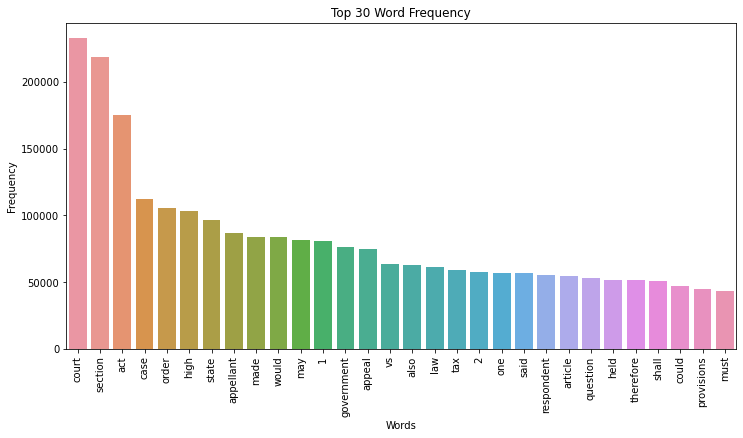

['court', 'section', 'act', 'case', 'order', 'high', 'state', 'appellant', 'made', 'would', 'may', '1', 'government', 'appeal', 'vs', 'also', 'law', 'tax', '2', 'one', 'said', 'respondent', 'article', 'question', 'held', 'therefore', 'shall', 'could', 'provisions', 'must']


In [ ]:

legal_stopwords = find_legal_stopwords(judgements, summaries)
print(legal_stopwords)


In [ ]:
orig

,filename,judgement,summary,judgement_len,summary_len
0,3644,vil Appeal No. 1948 of 1968 '. Appeal from the...,The appellant purchased the land in question f...,9330,1903.0
1,5235,Criminal Appeal No. 13 of 1981 From the Judgme...,"The appellant and the respondent, who were alr...",13803,7181.0
2,1053,Appeal No. 222 of 1960. Appeal from the judgme...,The respondents filed a suit for specific perf...,25070,3116.0
3,1735,Appeal No. 507 of 1961. Appeal from the judgme...,Respondent No. 1 obtained a mortgage decree fo...,15605,3876.0
4,5553,Civil Appeal No. 3947 (NT) of 1987. From the J...,"% The respondent, Aditya V. Birla, described t...",15509,3631.0
...,...,...,...,...,...
7025,6043,ivil Appeal No. 1357 of 1973. From the Judgmen...,One Darbar Harsurvala by virtue of a declarato...,19542,3476.0
7026,6725,ivil Appeal No. 2123 of 1991. From the Judgmen...,The appellant was a Manager in one of the bran...,23952,6232.0
7027,2543,Appeals Nos. 1153 to 1160 and 1161 to 1168 of ...,The assessee Electricity Board constituted und...,20019,3596.0
7028,3885,Civil Appeal No. 2329 of 1969. Appeal by Speci...,Practice and Procedure Conduct of parties to b...,17746,4456.0


Lets try to find out no. of nouns,adverbs,adjectives in each judgement as well as its corresponding summary

In [ ]:
import lexnlp.nlp.en.tokens

In [ ]:
#try
text = "The brown fox barely jumps over the lazy dog."
print(len(list(lexnlp.nlp.en.tokens.get_nouns(text))))

2


In [ ]:
orig

,filename,judgement,summary,judgement_len,summary_len
0,3644,vil Appeal No. 1948 of 1968 '. Appeal from the...,The appellant purchased the land in question f...,9330,1903
1,5235,Criminal Appeal No. 13 of 1981 From the Judgme...,"The appellant and the respondent, who were alr...",13803,7181
2,1053,Appeal No. 222 of 1960. Appeal from the judgme...,The respondents filed a suit for specific perf...,25070,3116
3,1735,Appeal No. 507 of 1961. Appeal from the judgme...,Respondent No. 1 obtained a mortgage decree fo...,15605,3876
4,5553,Civil Appeal No. 3947 (NT) of 1987. From the J...,"% The respondent, Aditya V. Birla, described t...",15509,3631
...,...,...,...,...,...
7025,6043,ivil Appeal No. 1357 of 1973. From the Judgmen...,One Darbar Harsurvala by virtue of a declarato...,19542,3476
7026,6725,ivil Appeal No. 2123 of 1991. From the Judgmen...,The appellant was a Manager in one of the bran...,23952,6232
7027,2543,Appeals Nos. 1153 to 1160 and 1161 to 1168 of ...,The assessee Electricity Board constituted und...,20019,3596
7028,3885,Civil Appeal No. 2329 of 1969. Appeal by Speci...,Practice and Procedure Conduct of parties to b...,17746,4456


In [ ]:
orig['NounsListLengthJudge'] = orig['judgement'].apply(lambda x: len(list(lexnlp.nlp.en.tokens.get_nouns(x))))

In [ ]:
orig['VerbListLengthJudge'] = orig['judgement'].apply(lambda x: len(list(lexnlp.nlp.en.tokens.get_verbs(x))))

In [ ]:
orig['AdjectivesListLengthJudge'] = orig['judgement'].apply(lambda x: len(list(lexnlp.nlp.en.tokens.get_adjectives(x))))

In [ ]:
orig['AdverbsListLengthJudge'] = orig['judgement'].apply(lambda x: len(list(lexnlp.nlp.en.tokens.get_adverbs(x))))

In [ ]:
orig

,filename,judgement,summary,judgement_len,summary_len,NounsListLengthJudge,VerbListLengthJudge,AdjectivesListLengthJudge,AdverbsListLengthJudge
0,3644,vil Appeal No. 1948 of 1968 '. Appeal from the...,The appellant purchased the land in question f...,9330,1903,468,265,93,63
1,5235,Criminal Appeal No. 13 of 1981 From the Judgme...,"The appellant and the respondent, who were alr...",13803,7181,713,420,100,99
2,1053,Appeal No. 222 of 1960. Appeal from the judgme...,The respondents filed a suit for specific perf...,25070,3116,1215,746,254,156
3,1735,Appeal No. 507 of 1961. Appeal from the judgme...,Respondent No. 1 obtained a mortgage decree fo...,15605,3876,833,394,186,73
4,5553,Civil Appeal No. 3947 (NT) of 1987. From the J...,"% The respondent, Aditya V. Birla, described t...",15509,3631,798,390,176,76
...,...,...,...,...,...,...,...,...,...
7025,6043,ivil Appeal No. 1357 of 1973. From the Judgmen...,One Darbar Harsurvala by virtue of a declarato...,19542,3476,1103,480,172,102
7026,6725,ivil Appeal No. 2123 of 1991. From the Judgmen...,The appellant was a Manager in one of the bran...,23952,6232,1256,595,207,114
7027,2543,Appeals Nos. 1153 to 1160 and 1161 to 1168 of ...,The assessee Electricity Board constituted und...,20019,3596,1132,535,193,107
7028,3885,Civil Appeal No. 2329 of 1969. Appeal by Speci...,Practice and Procedure Conduct of parties to b...,17746,4456,1050,428,142,98


In [ ]:
import pickle

# Save data to a pickle file
with open('/Users/meetbanthia/Documents/HaleLab/analysis.pickle', 'wb') as file:
    pickle.dump(orig, file)

In [ ]:
orig

,filename,judgement,summary,judgement_len,summary_len,NounsListLengthJudge,VerbListLengthJudge,AdjectivesListLengthJudge,AdverbsListLengthJudge
0,3644,vil Appeal No. 1948 of 1968 '. Appeal from the...,The appellant purchased the land in question f...,9330,1903,468,265,93,63
1,5235,Criminal Appeal No. 13 of 1981 From the Judgme...,"The appellant and the respondent, who were alr...",13803,7181,713,420,100,99
2,1053,Appeal No. 222 of 1960. Appeal from the judgme...,The respondents filed a suit for specific perf...,25070,3116,1215,746,254,156
3,1735,Appeal No. 507 of 1961. Appeal from the judgme...,Respondent No. 1 obtained a mortgage decree fo...,15605,3876,833,394,186,73
4,5553,Civil Appeal No. 3947 (NT) of 1987. From the J...,"% The respondent, Aditya V. Birla, described t...",15509,3631,798,390,176,76
...,...,...,...,...,...,...,...,...,...
7025,6043,ivil Appeal No. 1357 of 1973. From the Judgmen...,One Darbar Harsurvala by virtue of a declarato...,19542,3476,1103,480,172,102
7026,6725,ivil Appeal No. 2123 of 1991. From the Judgmen...,The appellant was a Manager in one of the bran...,23952,6232,1256,595,207,114
7027,2543,Appeals Nos. 1153 to 1160 and 1161 to 1168 of ...,The assessee Electricity Board constituted und...,20019,3596,1132,535,193,107
7028,3885,Civil Appeal No. 2329 of 1969. Appeal by Speci...,Practice and Procedure Conduct of parties to b...,17746,4456,1050,428,142,98


In [ ]:
orig.to_excel("/Users/meetbanthia/Documents/HaleLab/analysis.xlsx")